In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 복습

1. csv 폴더 안에 있는 drinks.csv 파일 로드
2. 데이터 프레임의 정보, 결측치가 존재하는가 ?
3. column의 이름을 변경 -> ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']
4. 대륙 column에 결측치가 존재 -> 결측치를 'OT'로 대체
5. 새로운 파생변수 '총 술소비량' 생성 -> 맥주소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수 '도수' 생성 -> 소비알콜량 / 총 술소비량 * 100
7. 도수 column의 전체 평균보다 대륙별 도수 평균이 높은 대륙을 출력


In [125]:
df = pd.read_csv('../../csv/drinks.csv')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [127]:
df.isna().sum()


## 결측치가 존재하는 컬럼은 어디인가? 를 보고싶다면
df.isna().any(axis=0) # axis를 index로 묶어야 column들이 나오겠지 :>

country                         False
beer_servings                   False
spirit_servings                 False
wine_servings                   False
total_litres_of_pure_alcohol    False
continent                        True
dtype: bool

In [128]:
df.columns = ['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙']

In [129]:
df.columns

Index(['국가', '맥주소비량', '증류주소비량', '와인소비량', '소비알콜량', '대륙'], dtype='object')

In [130]:
df['대륙'].fillna('OT', inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_28240\3990951094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['대륙'].fillna('OT', inplace= True)


In [131]:
df['총 술소비량'] = df['맥주소비량'] + df['증류주소비량'] + df['와인소비량']

In [132]:
df['도수'] = (df['소비알콜량'] / df['총 술소비량']) * 100 # 혹시 모르니 () 넣어주는게 좋다 :>

In [133]:
flag = df['도수'].isna()

In [134]:
df[flag]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,NaN
13,Bangladesh,0,0,0,0.0,AS,0,NaN
46,North Korea,0,0,0,0.0,AS,0,NaN
79,Iran,0,0,0,0.0,AS,0,NaN
90,Kuwait,0,0,0,0.0,AS,0,NaN
97,Libya,0,0,0,0.0,AF,0,NaN
103,Maldives,0,0,0,0.0,AS,0,NaN
106,Marshall Islands,0,0,0,0.0,OC,0,NaN
107,Mauritania,0,0,0,0.0,AF,0,NaN
111,Monaco,0,0,0,0.0,EU,0,NaN


In [108]:
df[flag] = df[flag].fillna(0) # 여기 왜 inplace = True 안되냐
                                # flag 조건을 넣어두면 DataFrame의 부분으로 잡혀서 적용이 안 된것 같아
                                # df['도수']처럼 Series로 선택하면 inplace
                                # inplace의 구조적인 문제로 안 들어가는거야. 1차원의 부분은 변경이 쉽지만 2차원의 부분은 변경이 어려워서 잘 적용이 안 되는 것 같아.

In [109]:
df

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,4.545455


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   국가      193 non-null    object 
 1   맥주소비량   193 non-null    int64  
 2   증류주소비량  193 non-null    int64  
 3   와인소비량   193 non-null    int64  
 4   소비알콜량   193 non-null    float64
 5   대륙      193 non-null    object 
 6   총 술소비량  193 non-null    int64  
 7   도수      193 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 12.2+ KB


In [111]:
mean_proof = df['도수'].mean()

In [112]:
mean_proof

2.6114806003105255

In [113]:
mean_continent = df[['대륙', '도수']].groupby(['대륙']).mean() # 여기 groupby()에 [] 넣어주는게 정신 건강에 좋아 :>

In [114]:
mean_continent

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


In [120]:
flag = mean_continent['도수'] > mean_proof # 츌력을 위한 조건 flag 생성

In [121]:
flag # 확인

대륙
AF     True
AS    False
EU    False
OC    False
OT    False
SA    False
Name: 도수, dtype: bool

In [123]:
mean_continent[flag] # 조건에 맞는 value 출력

,도수
대륙,
AF,4.974072


In [117]:
'''mean_continent.map(
    lambda x : x > mean_proof,
)''' # 이걸 안 해도 되지 :> 

,도수
대륙,
AF,True
AS,False
EU,False
OC,False
OT,False
SA,False


- 총 술 소비량을 기준으로 우리나라는 몇 위인가 ?

    1. 총 술 소비량을 기준으로 내림차순 정렬
    2. index를 초기화하고 기존의 index 제거
    3. 국가 column의 데이터가 South Korea인 데이터의 index와 총 술 소비량 데이터를 확인
    4. 전체 데이터를 기준으로 막대그래프를 생성하고 한국의 막대의 색상을 변경하고 주석을 추가


In [135]:
# 총 술 소비량을 기준으로 내림차순 정렬

drinks = df.copy()

In [137]:
drinks.sort_values(['총 술소비량'], ascending= False, inplace= True)

In [139]:
# index를 재지정 하고 기존의 index는 제거

drinks.reset_index(drop= True, inplace= True)

In [143]:
# South Korea의 데이터를 확인

flag = drinks['국가'] == 'South Korea'

drinks.loc[flag]

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [147]:
# South Korea의 index와 총 술소비량의 데이터를 변수에 저장
    # 그래프 그릴 때 화살표의 좌표를 설정하기 위해서 저장
        # korea_index는 x축 좌표 값, 막대의 위치값
        # korea_value는 y축 좌표 값

korea_index = drinks.loc[flag].index[0] # index만 쓰면 list 형태로 뽑히니까 이 list의 0번째 값으로 추출
korea_value = drinks.loc[korea_index, '총 술소비량']
# korea_value = df.iloc[korea_index, 6] 

In [148]:
# 아래 둘은 서로 다르다
    # df.loc[Series]는 결과가 df로 나오고
    # df.loc[value]는 결과가 series로 나온다.
        # 즉, 조건이 들어갈 곳 보다 조건의 차원이 하나 작다면 결과값의 차원이 하나 축소된다.
        # 이는 index와 column 개별로 작동한다(index로 Series로 뽑았는데 거기서 column의 조건을 적용하면 value가 나온다는 것)

'''drinks.loc[flag, '총 술소비량'] == 98   165
drinks.loc[korea_index, '총 술소비량'] == 165'''

98    165
Name: 총 술소비량, dtype: int64

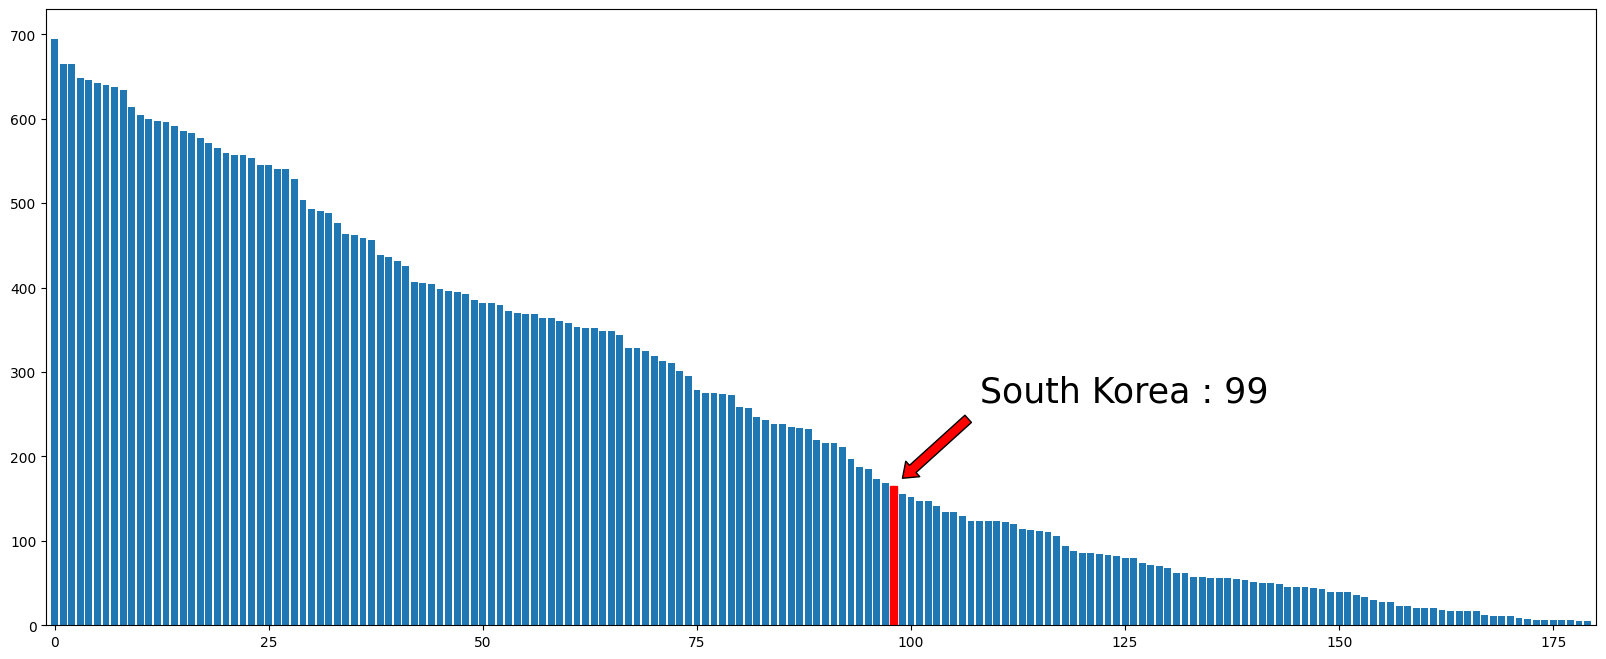

In [173]:
# 총 술소비량 데이터를 기준으로 막대그래프 생성

x = drinks.index
y = drinks['총 술소비량']

# 그래프의 크기를 변경 (막대가 너무 많은게 싫어서)

plt.figure(figsize = (20, 8))

# 막대그래프 생성

bar_list = plt.bar(x, y)

# South Korea의 막대를 선택하여 막대의 색상을 변경

bar_list[korea_index].set_color('r')

# 주석을 추가

plt.annotate(
    f'South Korea : {korea_index + 1}', # 변수 삽입 위해 fstring, 실제 순위를 표현하기 위해 index + 1
    xy=(korea_index, korea_value),
    xytext= (korea_index + 10, korea_value + 100), # x == korea_index로부터 막대 10개 떨어진, y == korea_value로부터 100계단 떨어진
    fontsize = 25, # 폰트 크기
    arrowprops={ # 화살표를 그리기
        'facecolor' : 'r',
        'edgecolor' : 'k', # 블랙 = k
        'headwidth' : 15,
        'headlength' : 10,
        'width' : 7,
        'shrink' : 0.1 # 막대와 화살표의 거리, 줄어들거나 늘어나거나 :>
    }
)

plt.xlim(-1, 180) # x축의 크기를 제한해서 x 축에 막대를 붙이려고 한 코드

plt.show()